🔹 **Model Accuracy Metrics:**
✔️ R² Score: 97.34%
✔️ Mean Squared Error (MSE): 699051.31
✔️ Root Mean Squared Error (RMSE): 836.09
✔️ Mean Absolute Error (MAE): 529.51

📌 **User Input:**
   Salary: ₹40,000
   City Tier: 1
   Dependents: 2
   Age: 30
   Education Spending Flag: Yes

📊 **Predicted Expenses (INR):**
   Housing: ₹12,144.80
   Healthcare & Insurance: ₹1,339.27
   Food: ₹5,894.95
   Travel: ₹2,412.30
   Lifestyle: ₹2,147.08
   Utilities & Bills: ₹3,190.48
   Education: ₹3,290.87
   Savings & Investments: ₹2,586.37


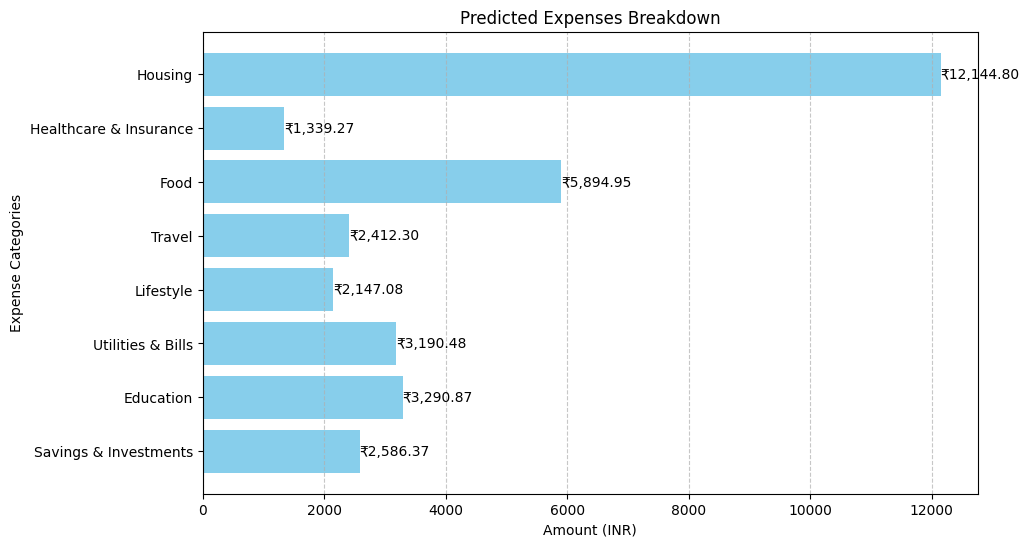

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load dataset
df = pd.read_csv("/content/final_dataset_with_education_flag.csv")

# Define independent (X) and dependent (y) variables
X = df[["Income", "City_Tier", "Dependents", "Age", "Education_Spending_Flag"]]
y = df[["Housing", "Healthcare & Insurance", "Food", "Travel", "Lifestyle", "Utilities & Bills", "Education", "Savings & Investments"]]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Maintain DataFrame structure

model = xgb.XGBRegressor(
    objective="reg:squarederror",
    n_estimators=800,          # Slightly increased for better learning
    learning_rate=0.07,        # Reduced learning rate for finer tuning
    max_depth=6,               # Original depth
    subsample=0.85,            # Adjusted subsampling
    colsample_bytree=0.9,      # Adjusted column sampling
    reg_alpha=0.1,             # Slightly increased L1 regularization
    reg_lambda=0.2,            # Slightly increased L2 regularization
    gamma=0.1,                 # Added gamma for tree complexity control
    random_state=42
)

# Train the model
model.fit(X_train_scaled, y_train)

# Evaluate model
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"🔹 **Model Accuracy Metrics:**")
print(f"✔️ R² Score: {r2 * 100:.2f}%")
print(f"✔️ Mean Squared Error (MSE): {mse:.2f}")
print(f"✔️ Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"✔️ Mean Absolute Error (MAE): {mae:.2f}")

# Save model and scaler
with open("xgboost_finance_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

def predict_expenses(income, city_tier, dependents, age, education_flag):
    """Predicts expenses with feature name consistency and income validation"""
    # Create DataFrame with proper column names
    input_df = pd.DataFrame([[income, city_tier, dependents, age, education_flag]],
                            columns=X.columns)

    input_scaled = scaler.transform(input_df)
    predicted_expenses = model.predict(input_scaled)[0]

    # Income validation
    total_predicted = sum(predicted_expenses)
    if total_predicted > income:
        scaling_factor = income / total_predicted
        predicted_expenses *= scaling_factor

    # Format results
    categories = y.columns.tolist()
    return {category: round(amount, 2) for category, amount in zip(categories, predicted_expenses)}

# Example usage remains the same
income = 40000
city_tier = 1
dependents = 2
age = 30
education_flag = 1

predicted_expenses = predict_expenses(income, city_tier, dependents, age, education_flag)

print("\n📌 **User Input:**")
print(f"   Salary: ₹{income:,}")
print(f"   City Tier: {city_tier}")
print(f"   Dependents: {dependents}")
print(f"   Age: {age}")
print(f"   Education Spending Flag: {'Yes' if education_flag else 'No'}")

print("\n📊 **Predicted Expenses (INR):**")

for category, amount in predicted_expenses.items():
    # Set Education expense to 0 if education_flag is 0
    if category == "Education" and education_flag == 0:
        amount = 0.0
    print(f"   {category}: ₹{amount:,.2f}")


import matplotlib.pyplot as plt

def plot_predicted_expenses(predicted_expenses):
    """Plots a bar chart of the predicted expenses."""
    categories = list(predicted_expenses.keys())
    amounts = list(predicted_expenses.values())

    plt.figure(figsize=(10, 6))
    plt.barh(categories, amounts, color='skyblue')
    plt.xlabel("Amount (INR)")
    plt.ylabel("Expense Categories")
    plt.title("Predicted Expenses Breakdown")
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.grid(axis="x", linestyle="--", alpha=0.7)

    # Show values on bars
    for index, value in enumerate(amounts):
        plt.text(value + 1, index, f"₹{value:,.2f}", va="center")

    plt.show()

# Call the function after printing expenses
plot_predicted_expenses(predicted_expenses)


Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 66975948.0000 - mse: 66975948.0000 - val_loss: 5058673.5000 - val_mse: 5058673.5000
Epoch 2/200
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5103840.5000 - mse: 5103840.5000 - val_loss: 4706261.5000 - val_mse: 4706261.5000
Epoch 3/200
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4980033.0000 - mse: 4980033.0000 - val_loss: 4531411.0000 - val_mse: 4531411.0000
Epoch 4/200
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4717135.5000 - mse: 4717135.5000 - val_loss: 4562852.5000 - val_mse: 4562852.5000
Epoch 5/200
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5179741.5000 - mse: 5179741.5000 - val_loss: 4513771.5000 - val_mse: 4513771.5000
Epoch 6/200
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5019663.5000 - mse: 5019663.5000 - val_loss: 4447082.0000 - val_mse: 4447082.0000
Epoch 7/200
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5019420.5000 - mse: 5019420.5000 - val_loss: 4187049.5000 - val_mse: 4187049.5000
Epoch 8/2

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
🔹 **Model Accuracy Metrics:**
✔️ R² Score: 90.77%
✔️ Mean Squared Error (MSE): 2134934.50
✔️ Root Mean Squared Error (RMSE): 1461.14
✔️ Mean Absolute Error (MAE): 874.22


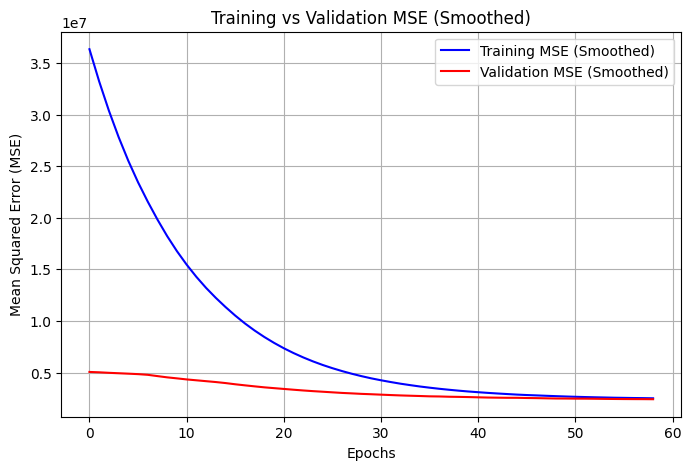

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import pickle

# Load dataset
df = pd.read_csv("/content/final_dataset_with_education_flag.csv")

# Define independent (X) and dependent (y) variables
X = df[["Income", "City_Tier", "Dependents", "Age", "Education_Spending_Flag"]]
y = df[["Housing", "Healthcare & Insurance", "Food", "Travel", "Lifestyle", "Utilities & Bills", "Education", "Savings & Investments"]]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Build DNN model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input Layer
    keras.layers.Dense(128, activation='relu'),  # Hidden Layer 1
    keras.layers.Dense(64, activation='relu'),  # Hidden Layer 2
    keras.layers.Dense(y.shape[1], activation='linear')  # Output Layer (8 outputs, linear activation)
])

# Compile model with lower learning rate
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.005), loss='mse', metrics=['mse'])

# Early stopping to prevent overfitting
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train model with increased batch size
history = model.fit(X_train_scaled, y_train, epochs=200, batch_size=64, validation_split=0.2,
                    callbacks=[early_stopping], verbose=1)

# Save the trained model
model.save("dnn_finance_model.h5")

# Evaluate model on test data
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"🔹 **Model Accuracy Metrics:**")
print(f"✔️ R² Score: {r2 * 100:.2f}%")
print(f"✔️ Mean Squared Error (MSE): {mse:.2f}")
print(f"✔️ Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"✔️ Mean Absolute Error (MAE): {mae:.2f}")

# Function to smooth loss curve using moving average
def smooth_curve(points, factor=0.9):
    """Applies exponential moving average smoothing to reduce flickering in graphs."""
    smoothed_points = []
    for point in points:
        if smoothed_points:
            smoothed_points.append(smoothed_points[-1] * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

# Function to plot training vs validation MSE with smoothing
def plot_training_mse(history):
    """Plots training vs validation MSE over epochs with smoothing."""
    plt.figure(figsize=(8, 5))

    train_loss = smooth_curve(history.history['loss'])
    val_loss = smooth_curve(history.history['val_loss'])

    plt.plot(train_loss, label="Training MSE (Smoothed)", color='blue')
    plt.plot(val_loss, label="Validation MSE (Smoothed)", color='red')

    plt.xlabel("Epochs")
    plt.ylabel("Mean Squared Error (MSE)")
    plt.title("Training vs Validation MSE (Smoothed)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function to visualize training progress
plot_training_mse(history)


In [ ]:
import pickle
import numpy as np

# Load the XGBoost model
with open("/content/xgboost_finance_model.pkl", "rb") as f:
    model = pickle.load(f)

# Load the Scaler
with open("/content/scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

print("Model and Scaler loaded successfully!")


Model and Scaler loaded successfully!


In [ ]:
import numpy as np
import pickle
import pandas as pd
# Load trained model and scaler
with open("/content/xgboost_finance_model.pkl", "rb") as f:
    model = pickle.load(f)

with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

def predict_expenses(income, city_tier, dependents, age, education_flag):
    """Predicts expenses while ensuring total spending does not exceed income."""


# Ensure input has the correct feature names
    feature_names = ["Income", "City_Tier", "Dependents", "Age", "Education_Spending_Flag"]
    input_data = pd.DataFrame([[income, city_tier, dependents, age, education_flag]], columns=feature_names)

# Scale input data
    input_scaled = scaler.transform(input_data)  # ✅ Now it has feature names

    predicted_expenses = model.predict(input_scaled)[0]  # Get first (and only) row of predictions

    # Ensure total spending doesn't exceed income
    total_predicted = sum(predicted_expenses)

    if total_predicted > income:
        scaling_factor = income / total_predicted  # Scale down expenses proportionally
        predicted_expenses = predicted_expenses * scaling_factor

    # Convert results to readable format
    categories = ["Housing", "Healthcare & Insurance", "Food", "Travel", "Lifestyle", "Utilities & Bills", "Education", "Savings & Investments"]
    formatted_results = {category: round(expense, 2) for category, expense in zip(categories, predicted_expenses)}

    return formatted_results

# Example usage
income = 29376
city_tier = 2
dependents = 1
age = 30
education_flag = 0

predicted_expenses = predict_expenses(income, city_tier, dependents, age, education_flag)

print("\n📌 **User Input:**")
print(f"   Salary: ₹{income:,}")
print(f"   City Tier: {city_tier}")
print(f"   Dependents: {dependents}")
print(f"   Age: {age}")
print(f"   Education Spending Flag: {'Yes' if education_flag else 'No'}")

print("\n📊 **Predicted Expenses (INR):**")
for category, amount in predicted_expenses.items():
    print(f"   {category}: ₹{amount:,.2f}")
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='xgboost')




📌 **User Input:**
   Salary: ₹29,376
   City Tier: 2
   Dependents: 1
   Age: 30
   Education Spending Flag: No

📊 **Predicted Expenses (INR):**
   Housing: ₹7,080.06
   Healthcare & Insurance: ₹1,442.39
   Food: ₹4,659.24
   Travel: ₹2,338.43
   Lifestyle: ₹2,968.71
   Utilities & Bills: ₹3,234.92
   Education: ₹1,591.51
   Savings & Investments: ₹4,227.54
